# Cryptocurrency Data Modeling Project 

This data project will focus on exploratory data analysis of cryptocurrency prices. <br>
Keep in mind, this project is just meant to practice visualization and pandas/numpy operations, it is not meant to be a robust financial analysis or be taken as financial advice.<br>
<br>
We'll focus on crypto currency prices over the last two years. 

## Data

We need to get data using pandas datareader. We will get stock information for the following cryptocurrencies:
*  Bitcoin
* Dogecoin
* Ethereum
* Litecoin
* Monero

Get the stock data from Jan 1st 2019 to Jan 1st 2021 for each of these crypto currencies. <br>
Set each crypto to be a separate dataframe, with the variable name for that bank being its ticker symbol.

In [1]:
from pandas_datareader import data, wb
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

/home/michaelromero/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# 1. use datetime to set start and end datetime objects.
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 1, 1)

In [3]:
# 2. use datareader to grab info on the stock.
bitcoin = data.DataReader('BTC-USD', 'yahoo', start, end)
dogecoin = data.DataReader('DOGE-USD', 'yahoo', start, end)
ethereum = data.DataReader('ETH-USD', 'yahoo', start, end)
litecoin = data.DataReader('LTC-USD', 'yahoo', start, end)
monero = data.DataReader('XMR-USD', 'yahoo', start, end)

bitcoin

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-01,7254.330566,7174.944336,7194.892090,7200.174316,1.856566e+10,7200.174316
2020-01-02,7212.155273,6935.270020,7202.551270,6985.470215,2.080208e+10,6985.470215
2020-01-03,7413.715332,6914.996094,6984.428711,7344.884277,2.811148e+10,7344.884277
2020-01-04,7427.385742,7309.514160,7345.375488,7410.656738,1.844427e+10,7410.656738
2020-01-05,7544.497070,7400.535645,7410.451660,7411.317383,1.972507e+10,7411.317383
...,...,...,...,...,...,...
2020-12-29,27370.720703,25987.298828,27081.810547,27362.437500,4.526595e+10,27362.437500
2020-12-30,28937.740234,27360.089844,27360.089844,28840.953125,5.128744e+10,28840.953125
2020-12-31,29244.876953,28201.992188,28841.574219,29001.720703,4.675496e+10,29001.720703


In [4]:
# list of the ticker symbols (as strings) in alphabetical order.
tickers = ['BTC-USD', 'DOGE-USD', 'ETH-USD', 'LTC-USD', 'XMR-USD']

# Use pd.concat to concatenate the crypto dataframes together to a single data frame called cryptocurrencies. 
# Set the keys argument equal to the tickers list. Axis is one so it's be columns.
cryptocurrencies = pd.concat([bitcoin, dogecoin, ethereum, litecoin, monero], 
                        axis=1,
                       keys=tickers)

In [5]:
# set the column name levels
cryptocurrencies.columns.names = ['Ticker symbol','Stock Info']

Check the head of the cryptocurrencies dataframe:

In [6]:
cryptocurrencies.head()

Ticker symbol      BTC-USD                                         \
Stock Info            High          Low         Open        Close   
Date                                                                
2020-01-01     7254.330566  7174.944336  7194.892090  7200.174316   
2020-01-02     7212.155273  6935.270020  7202.551270  6985.470215   
2020-01-03     7413.715332  6914.996094  6984.428711  7344.884277   
2020-01-04     7427.385742  7309.514160  7345.375488  7410.656738   
2020-01-05     7544.497070  7400.535645  7410.451660  7411.317383   

Ticker symbol                             DOGE-USD                      \
Stock Info           Volume    Adj Close      High       Low      Open   
Date                                                                     
2020-01-01     1.856566e+10  7200.174316  0.002052  0.002021  0.002028   
2020-01-02     2.080208e+10  6985.470215  0.002110  0.001983  0.002034   
2020-01-03     2.811148e+10  7344.884277  0.002177  0.001991  0.002008   
2020-01-04     1.844427e+10  7410.656738  0.002490  0.002050  0.002144   
2020-01-05     1.972507e+10  7411.317383  0.002491  0.002117  0.002240   

Ticker symbol            ...    LTC-USD                                      \
Stock Info        Close  ...       Open      Close        Volume  Adj Close   
Date                     ...                                                  
2020-01-01     0.002033  ...  41.326534  42.017719  2.782992e+09  42.017719   
2020-01-02     0.002009  ...  42.018085  39.823013  2.759827e+09  39.823013   
2020-01-03     0.002145  ...  39.863129  42.415573  3.260961e+09  42.415573   
2020-01-04     0.002241  ...  42.383526  43.326607  2.843193e+09  43.326607   
2020-01-05     0.002419  ...  43.291382  43.553207  3.017148e+09  43.553207   

Ticker symbol    XMR-USD                                                \
Stock Info          High        Low       Open      Close       Volume   
Date                                                                     
2020-01-01     45.960217  44.502789  44.578461  45.753544   75903149.0   
2020-01-02     46.214603  44.397278  45.764927  45.749470   81645163.0   
2020-01-03     51.980942  45.642765  45.642765  51.092037  145826653.0   
2020-01-04     51.545418  50.017021  51.054630  50.536694   61952234.0   
2020-01-05     54.777561  50.536011  50.536011  54.096893   51316114.0   

Ticker symbol             
Stock Info     Adj Close  
Date                      
2020-01-01     45.753544  
2020-01-02     45.749470  
2020-01-03     51.092037  
2020-01-04     50.536694  
2020-01-05     54.096893  

[5 rows x 30 columns]

# Exploratory Data Analysis

What is the max Close price for each crypto throughout the time period?

In [7]:
# Method 1
# for tick in tickers:
#     print(f"{tick}: {cryptocurrencies[tick]['Close'].max()} ")

# Method 2
cryptocurrencies.xs(key='Close', 
               axis=1,
               level='Stock Info').max()

Ticker symbol
BTC-USD     32127.267578
DOGE-USD        0.010615
ETH-USD       774.534973
LTC-USD       136.944885
XMR-USD       167.939651
dtype: float64

Create a new empty DataFrame called returns. <br>
This dataframe will contain the returns for each bank's stock. <br>
returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [8]:
returns = pd.DataFrame()

Use pandas pct_change() method on the Close column to create a column representing this return value. <br>
Create a for loop that goes and for each crypto Ticker creates this returns column and set's it as a column in the returns DataFrame.

In [9]:
for tick in tickers:
    returns[tick + ' Return'] = cryptocurrencies[tick]['Close'].pct_change()
returns.head()

returns.head()
# Note, first row being NaN makes sense since there's no way to tell the change from the first day

,BTC-USD Return,DOGE-USD Return,ETH-USD Return,LTC-USD Return,XMR-USD Return
Date,,,,,
2020-01-01,NaN,NaN,NaN,NaN,NaN
2020-01-02,-0.029819,-0.011805,-0.025931,-0.052233,-0.000089
2020-01-03,0.051452,0.067695,0.053069,0.065102,0.116779
2020-01-04,0.008955,0.044755,0.006690,0.021479,-0.010869
2020-01-05,0.000089,0.079429,0.008939,0.005230,0.070448


Create a pairplot using seaborn of the returns dataframe. <br>
What cryptos stands out and why?

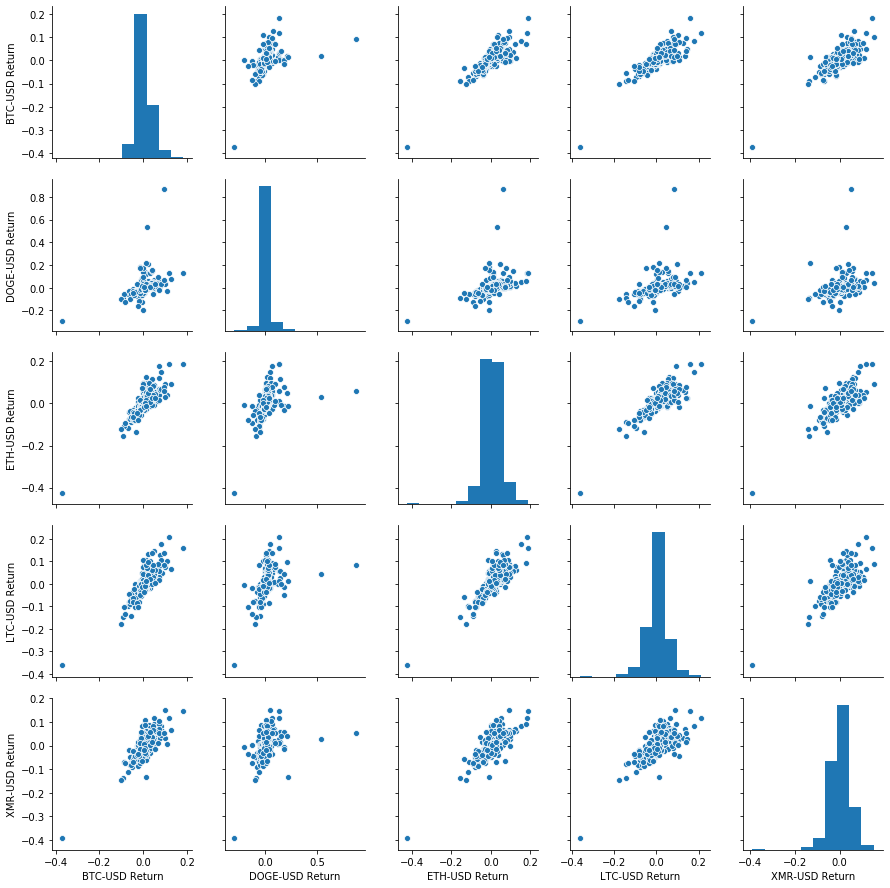

In [10]:
sns.pairplot(returns[1:])

* They all seem to follow Bitcoin's trend (except Dogecoin the "meme stock") <br>

Recall Dogecoin has been flat until the massive spike from the internet trend. 

What dates each crytocurrencies had the best and worst single day returns?

In [11]:
# worst single day
returns.idxmin() 

BTC-USD Return    2020-03-12
DOGE-USD Return   2020-03-12
ETH-USD Return    2020-03-12
LTC-USD Return    2020-03-12
XMR-USD Return    2020-03-12
dtype: datetime64[ns]

In [12]:
# Best single day
returns.idxmax()

BTC-USD Return    2020-03-19
DOGE-USD Return   2021-01-02
ETH-USD Return    2020-03-19
LTC-USD Return    2020-03-13
XMR-USD Return    2020-03-23
dtype: datetime64[ns]

Which crypto would you classify as the riskiest over the entire time period? <br>
Which would you classify as the riskiest for the year 2020?

In [13]:
# Riskiest w/ large stanard deviation
returns.std()

BTC-USD Return     0.038155
DOGE-USD Return    0.071287
ETH-USD Return     0.049671
LTC-USD Return     0.051411
XMR-USD Return     0.046756
dtype: float64

Dogecoin has the highest standard deviation so it's the "riskiest"

In [14]:
# Riskiest of 2020
returns.loc['2020-01-01': '2020-12-31'].std()

BTC-USD Return     0.037970
DOGE-USD Return    0.054078
ETH-USD Return     0.049719
LTC-USD Return     0.051377
XMR-USD Return     0.046271
dtype: float64

Create distplot using seaborn of the 2020 returns for Bitcoin:

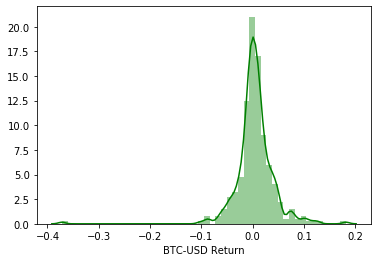

In [15]:
sns.distplot(returns.loc['2020-01-01': '2020-12-31']['BTC-USD Return'],
            color='green',
            bins=50)

Create a distplot using seaborn of the 2020 returns for Dogecoin:

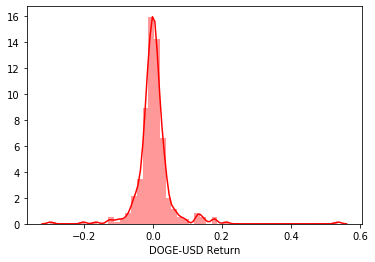

In [16]:
sns.distplot(returns.loc['2020-01-01': '2020-12-31']['DOGE-USD Return'],
            color='red',
            bins=50)
# notice how much more spread out Dogecoin is 

# More Visualization

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

Create line plot showing Close price for each cryptocurrency for the entire index of time:

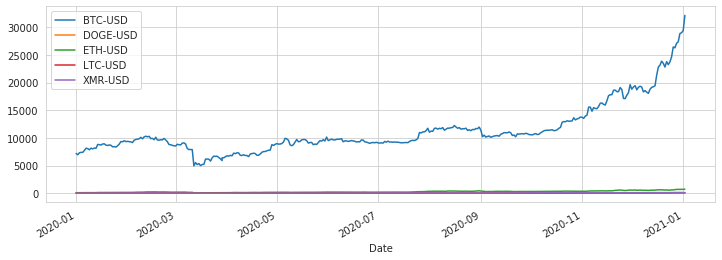

In [18]:
for tick in tickers:
    cryptocurrencies[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend()

/home/michaelromero/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



(0, 800)

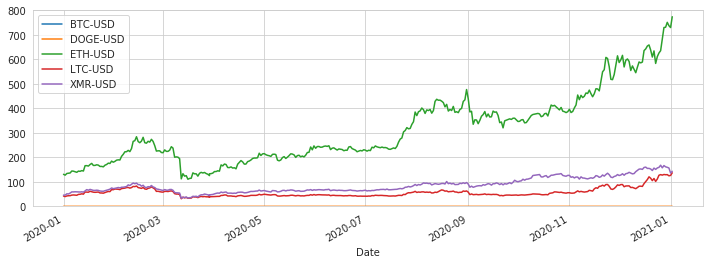

In [19]:
for tick in tickers:
    cryptocurrencies[tick]['Close'].plot(label=tick, figsize=(12,4))
plt.legend()

axes = plt.axes()
axes.set_ylim([0, 800]) # change axes to zoom in on alt-coins

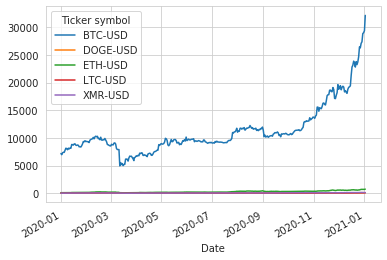

In [20]:
cryptocurrencies.xs(key='Close', 
              axis=1,
              level='Stock Info').plot()

/home/michaelromero/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



(0, 800)

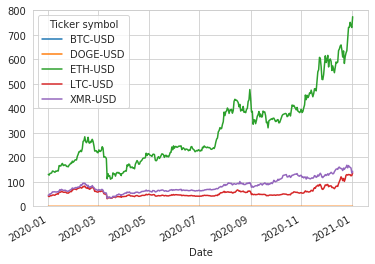

In [21]:
cryptocurrencies.xs(key='Close', 
              axis=1,
              level='Stock Info').plot()

axes = plt.axes()
axes.set_ylim([0, 800]) # view alt-coins

## Moving Averages

Let's analyze the moving averages for these crypto's in the year 2020. 

Plot the rolling 30 day average against the Close Price for Bitcoin for the year 2020:

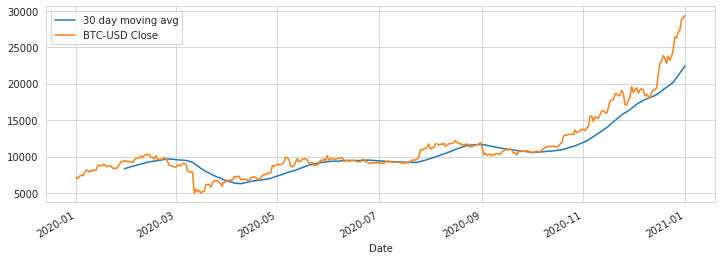

In [22]:
plt.figure(figsize=(12,4))

bitcoin['Close'].loc['2020-01-01': '2021-01-01'].rolling(window=30).mean().plot(label='30 day moving avg')
bitcoin['Close'].loc['2020-01-01': '2021-01-01'].plot(label='BTC-USD Close')

plt.legend()

Create a heatmap of the correlation between the cryptos' Close Price:

(5.0, 0.0)

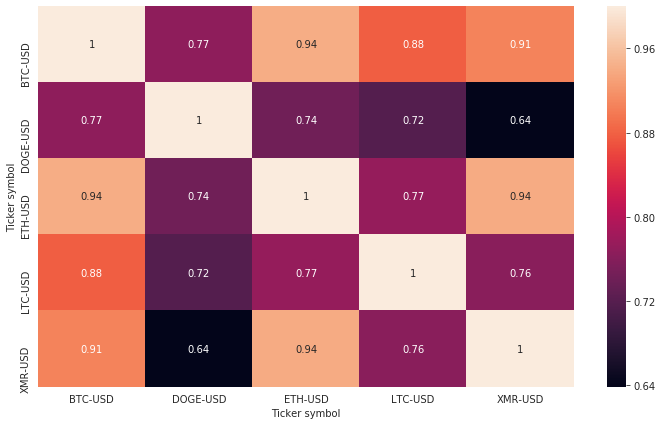

In [23]:
cryptocurrencies.xs(key='Close', axis=1, level='Stock Info') #  matrix
cryptocurrencies.xs(key='Close', axis=1, level='Stock Info').corr()

plt.figure(figsize=(12,7))

ax = sns.heatmap(cryptocurrencies.xs(key='Close', axis=1, level='Stock Info').corr(), 
                 annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The first row (BTC) shows there's a strong correlation between the rest of the alt coins, except for Dogecoin.

Use seaborn's clustermap to cluster the correlations together:

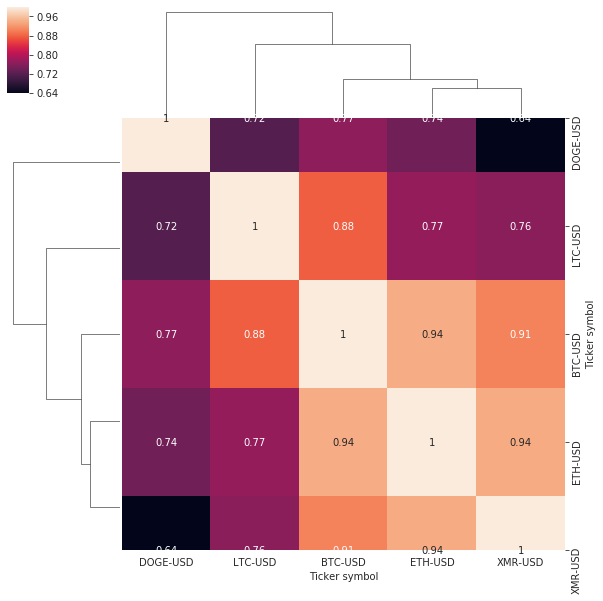

In [24]:
sns.clustermap(cryptocurrencies.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True)

#### Last 5 years trend

In [25]:
start = datetime.datetime(2016, 1, 1)

In [26]:
bitcoin = data.DataReader('BTC-USD', 'yahoo', start, end)
dogecoin = data.DataReader('DOGE-USD', 'yahoo', start, end)
ethereum = data.DataReader('ETH-USD', 'yahoo', start, end)
litecoin = data.DataReader('LTC-USD', 'yahoo', start, end)
monero = data.DataReader('XMR-USD', 'yahoo', start, end)

In [27]:
tickers = ['BTC-USD', 'DOGE-USD', 'ETH-USD', 'LTC-USD', 'XMR-USD']

cryptocurrencies = pd.concat([bitcoin, dogecoin, ethereum, litecoin, monero], 
                        axis=1,
                       keys=tickers)

In [28]:
cryptocurrencies.columns.names = ['Ticker symbol','Stock Info']

In [29]:
returns = pd.DataFrame()

In [30]:
for tick in tickers:
    returns[tick + ' Return'] = cryptocurrencies[tick]['Close'].pct_change()
returns.head()

returns.head()

,BTC-USD Return,DOGE-USD Return,ETH-USD Return,LTC-USD Return,XMR-USD Return
Date,,,,,
2016-01-01,NaN,NaN,NaN,NaN,NaN
2016-01-02,-0.002063,-0.019480,-0.011498,-0.001944,0.069900
2016-01-03,-0.007907,-0.033113,0.037115,-0.005451,-0.060743
2016-01-04,0.007163,-0.013699,-0.017929,0.003537,0.034131
2016-01-05,-0.002611,-0.048611,-0.004509,-0.007358,-0.035014


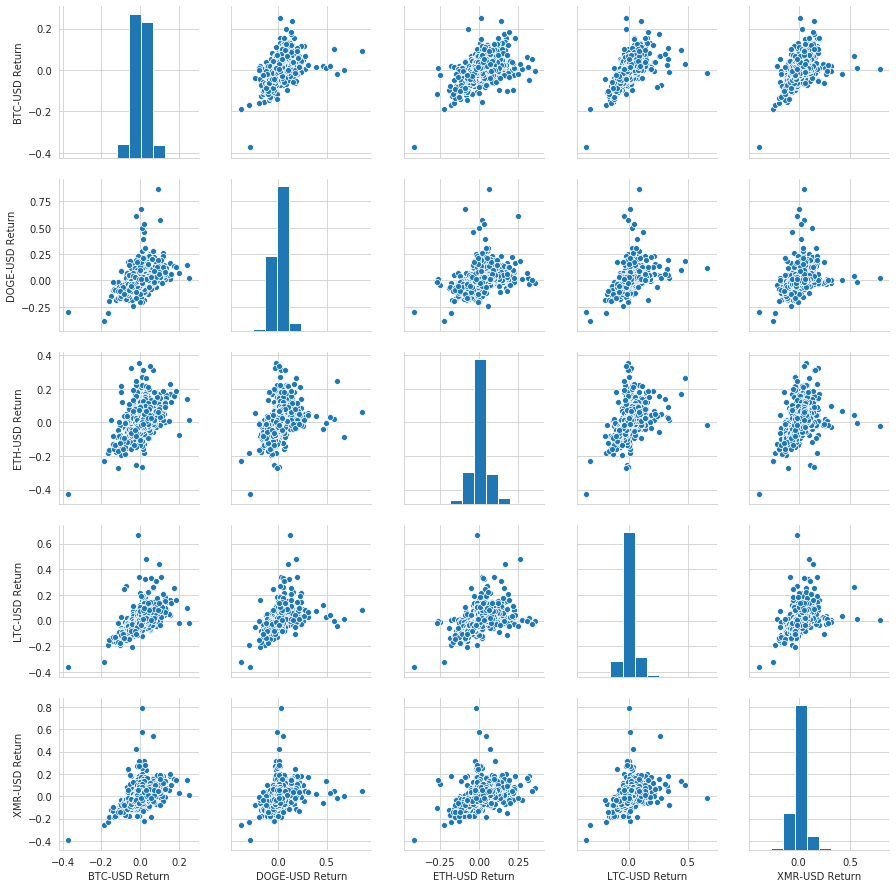

In [31]:
sns.pairplot(returns[1:])

(5.0, 0.0)

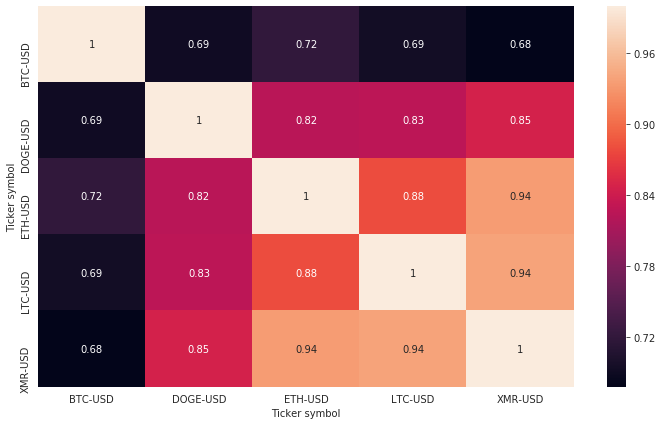

In [32]:
cryptocurrencies.xs(key='Close', axis=1, level='Stock Info') #  matrix
cryptocurrencies.xs(key='Close', axis=1, level='Stock Info').corr()

plt.figure(figsize=(12,7))

ax = sns.heatmap(cryptocurrencies.xs(key='Close', axis=1, level='Stock Info').corr(), 
                 annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Long term trends show there's no real correlation between the increase of Bitcoin and the other alt coins. <br>
It looks like BTC and DOGE are outliers and the other alt coins are correlated to each other.